# Rain in Australia

**objective**

In this project i would be predicting next-day rain by training classification models on the target variable RainTomorrow.

**Content**

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No?

**Source & Acknowledgements**

Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

In [1]:
pip install jovian --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import jovian

In [3]:
jovian.commit(project='Predict next-day rain in Australia')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "wells-2104/predict-next-day-rain-in-australia" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/wells-2104/predict-next-day-rain-in-australia


'https://jovian.ai/wells-2104/predict-next-day-rain-in-australia'

In [4]:
pip install opendatasets plotly --quiet

Note: you may need to restart the kernel to use updated packages.


In [5]:
#importing the neccesary modules
import os
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Data Preparation and cleaning

**downloading the dataset**

In [7]:
od.download('https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in ".\weather-dataset-rattle-package" (use force=True to force download)


In [8]:
os.listdir(".\weather-dataset-rattle-package" )

['weatherAUS.csv']

In [9]:
rain_df = pd.read_csv(".\weather-dataset-rattle-package\weatherAUS.csv")

In [10]:
rain_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Since the dataset is computed in years(2008 - 2017), we are gonna split the dataset into training, validation and a test set using the years.

(2008 - 2014) -- Training set

(2015) -- Validation set

(2016 - 2017) -- Test set

**Splitting the datasets**

In [11]:
year = pd.to_datetime(rain_df.Date).dt.year

In [12]:
train_df = rain_df[year < 2015].copy()
val_df = rain_df[year == 2015].copy()
test_df = rain_df[year > 2015].copy()

In [13]:
train_df.shape, val_df.shape, test_df.shape

((101018, 23), (17885, 23), (26557, 23))

Its not a perfect 60, 20, 20 split, but its still very useful

**Feature Engineering**

Lets create columns that has the month, weekday, day

In [14]:
train_df['month'] = pd.to_datetime(train_df.Date).dt.month
train_df['weekday'] = pd.to_datetime(train_df.Date).dt.weekday
train_df['day'] = pd.to_datetime(train_df.Date).dt.day

In [15]:
val_df['month'] = pd.to_datetime(val_df.Date).dt.month
val_df['weekday'] = pd.to_datetime(val_df.Date).dt.weekday
val_df['day'] = pd.to_datetime(val_df.Date).dt.day

In [16]:
test_df['month'] = pd.to_datetime(test_df.Date).dt.month
test_df['weekday'] = pd.to_datetime(test_df.Date).dt.weekday
test_df['day'] = pd.to_datetime(test_df.Date).dt.day

In [17]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,weekday,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12,0,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12,1,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12,2,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12,3,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,2014-12-27,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,24.0,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No,No,12,5,27
144549,2014-12-28,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,19.0,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No,No,12,6,28
144550,2014-12-29,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,26.0,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No,No,12,0,29
144551,2014-12-30,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,28.0,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No,No,12,1,30


In [18]:
#checking for missing values

train_df.isna().sum()

Date                 0
Location             0
MinTemp            736
MaxTemp            534
Rainfall          2031
Evaporation      38486
Sunshine         42008
WindGustDir       7665
WindGustSpeed     7623
WindDir9am        7745
WindDir3pm        2367
WindSpeed9am      1454
WindSpeed3pm      1462
Humidity9am       1590
Humidity3pm       1504
Pressure9am       9800
Pressure3pm       9766
Cloud9am         37105
Cloud3pm         38130
Temp9am           1105
Temp3pm            978
RainToday         2031
RainTomorrow      2030
month                0
weekday              0
day                  0
dtype: int64

our dataset contains missing values

our target should not have an empty value. So therefore i would be dropping rows where the value of RainTommorow is empty

In [19]:
train_df.dropna(subset = ["RainTomorrow"], inplace=True)
val_df.dropna(subset = ["RainTomorrow"], inplace=True)
test_df.dropna(subset = ["RainTomorrow"], inplace=True)

**Identifying input and target columns**

In [20]:
input_cols = list(train_df.columns)[1:-4] + ['month', 'weekday', 'day']

In [21]:
target_cols = 'RainTomorrow'

In [22]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [23]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [24]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

**identifying numerical and categorical columns**

In [25]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()
categorical_cols = train_inputs.select_dtypes('object').columns.to_list()

In [26]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [27]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'month',
 'weekday',
 'day']

**imputing categorical columns**

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
imputer = SimpleImputer(strategy='most_frequent')

In [30]:
imputer.fit(train_inputs[categorical_cols])

SimpleImputer(strategy='most_frequent')

In [31]:
train_inputs[categorical_cols] = imputer.transform(train_inputs[categorical_cols])
val_inputs[categorical_cols] = imputer.transform(val_inputs[categorical_cols])
test_inputs[categorical_cols] = imputer.transform(test_inputs[categorical_cols])

**imputing numeric columns**

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
imputer = SimpleImputer(strategy='mean')

In [34]:
imputer.fit(train_inputs[numeric_cols])

SimpleImputer()

In [35]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [36]:
val_inputs.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
month            0
weekday          0
day              0
dtype: int64

No more missing Values

**scaling numeric columns**

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [39]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

**one-hot-encoding categorical columns**

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
?OneHotEncoder

In [42]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])

In [43]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [44]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\Wells\AppData\Local\Temp\ipykernel_8828\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Wells\AppData\Local\Temp\ipykernel_8828\1584174743.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
C:\Users\Wells\AppData\Local\Temp\ipykernel_8828\1584174743.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling

In [45]:
X_train = train_inputs[encoded_cols + numeric_cols]
X_val = val_inputs[encoded_cols + numeric_cols]
X_test = test_inputs[encoded_cols + numeric_cols]

# Exploratory Data Analysis

Lets Look at the distribution of some columns

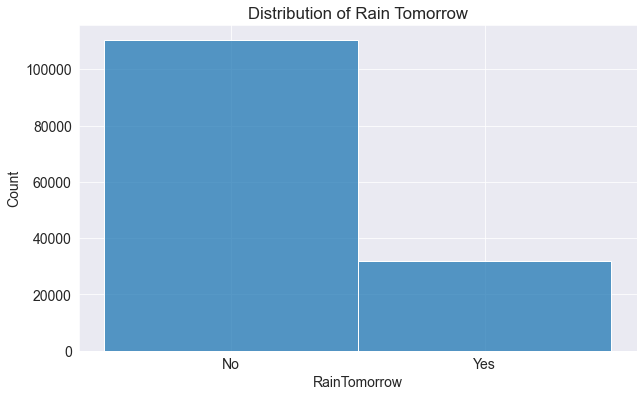

In [46]:
plt.title('Distribution of Rain Tomorrow')
sns.histplot(rain_df.RainTomorrow);

This shows that Australia as a country has a very limited amount of rainfall

*Lets look at the different locations and the amount of rainfall in each of them*

In [47]:
yes_rain = rain_df[rain_df.RainTomorrow == 'Yes'].groupby('Location')[['RainTomorrow']].count()

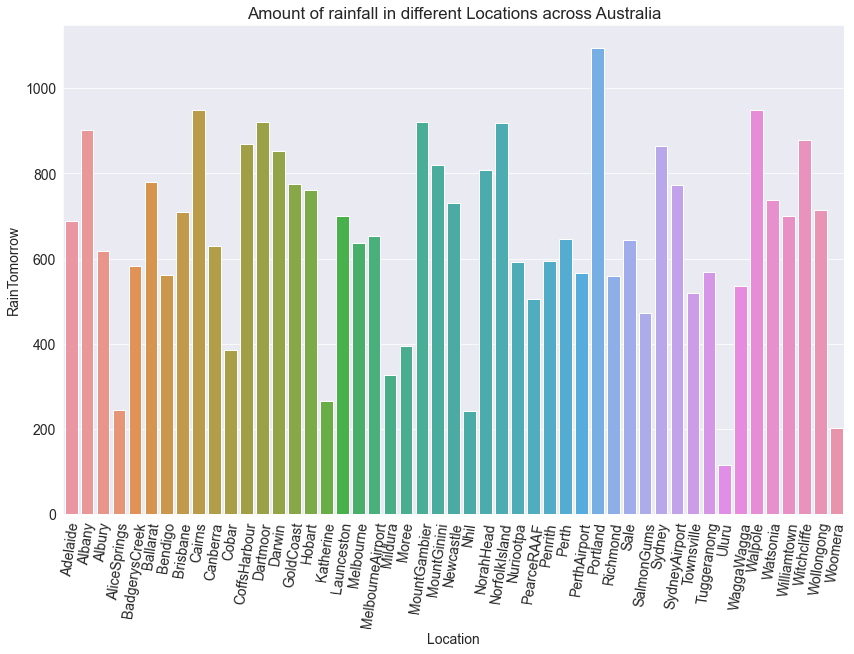

In [48]:
plt.figure(figsize=(14, 9))
sns.barplot(x=yes_rain.index, y=yes_rain.RainTomorrow);
plt.xticks(rotation=82);
plt.title('Amount of rainfall in different Locations across Australia');

Now, we have gone through the visualization of the amount of rain in different locations in australia.

We can see through the visualization above that "Portland" has the highest amount of rainfall in australia than any other locations, while "Uluru" has the lowest amount of rainfall.

*Lets look at the relationship between Pressure9am and Pressure3pm*

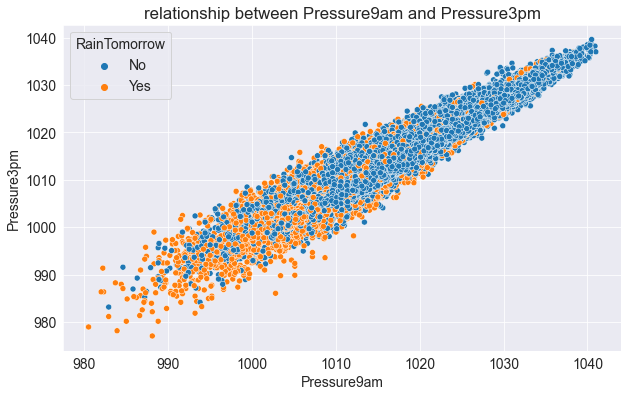

In [49]:
sns.scatterplot(data=rain_df, x='Pressure9am', y='Pressure3pm', hue='RainTomorrow');
plt.title('relationship between Pressure9am and Pressure3pm');

Looking at the Visualization above, We can see that more of the plots when RainTomorrow is "No" has the Pressure9am and Pressure3pm high

Therefore we can draw the following insight from the chart:

1. Pressure9am and Pressure3pm affects whether rain would fall the next day.

2. The more higher the Pressure9am and Pressure3pm of that day, the more unlikely of rain falling the next day

*Lets take a quick look at the weekdays rain fall the most in australlia*

In [50]:
yes_rain_2 = train_df[train_df.RainTomorrow == 'Yes'].groupby('weekday')[['RainTomorrow']].count()

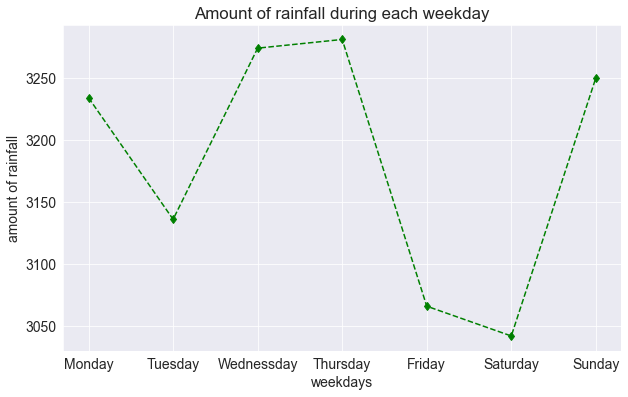

In [51]:
plt.plot(yes_rain_2.index, yes_rain_2.RainTomorrow, 'd--g');
plt.title('Amount of rainfall during each weekday');
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednessday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
plt.xlabel('weekdays');
plt.ylabel('amount of rainfall');

Thursdays are the days when rain mostly falls in Australia

# Training a Logistic Regression Model

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
?LogisticRegression

In [54]:
model = LogisticRegression(random_state=42).fit(X_train, train_targets)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
model.score(X_train, train_targets)

0.8496484422354225

**hyperparameter tuning**

Lets define a helper function to check for the best solver hyperparameter

In [56]:
def solver(solver):
    model = LogisticRegression(random_state = 42, solver=solver)
    model.fit(X_train, train_targets)
    train_error = 1- model.score(X_train, train_targets)
    val_error = 1- model.score(X_val, val_targets)
    test_error = 1- model.score(X_test, test_targets)
    return {'solver': solver, 'train_error': train_error, 'val_error': val_error, 'test_error': test_error}

In [57]:
solver('lbfgs')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'solver': 'lbfgs',
 'train_error': 0.15035155776457754,
 'val_error': 0.14775694968370956,
 'test_error': 0.16019866019866025}

In [58]:
solver('sag')

{'solver': 'sag',
 'train_error': 0.15035155776457754,
 'val_error': 0.14775694968370956,
 'test_error': 0.16019866019866025}

Lets also define a helper function to help us iterate over the best possible max_iter hyperparameter

In [59]:
def max_iter(mi):
    model = LogisticRegression(random_state = 42, solver='sag', max_iter=mi)
    model.fit(X_train, train_targets)
    train_error = 1- model.score(X_train, train_targets)
    val_error = 1- model.score(X_val, val_targets)
    test_error = 1- model.score(X_test, test_targets)
    return {'max_iter': mi, 'train_error': train_error, 'val_error': val_error, 'test_error': test_error}

In [60]:
max_iter(35)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'max_iter': 35,
 'train_error': 0.15035155776457754,
 'val_error': 0.14775694968370956,
 'test_error': 0.16019866019866025}

*Lets put the hyperparameters all together and train the model*

In [61]:
model = LogisticRegression(random_state = 42, solver='sag', max_iter=35)

In [62]:
model.fit(X_train, train_targets)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=35, random_state=42, solver='sag')

In [63]:
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

**accuracy of the model**

In [64]:
train_acc = round(model.score(X_train, train_targets), 3)
print("train accuracy: {:2}%".format(train_acc *100))

train accuracy: 85.0%


In [65]:
val_acc = round(model.score(X_val, val_targets), 3)
print("validation accuracy: {:2}%".format(val_acc *100))

validation accuracy: 85.2%


In [66]:
test_acc = round(model.score(X_test, test_targets), 3)
print("test accuracy: {:2}%".format(test_acc *100))

test accuracy: 84.0%


The model had a **training accuracy of 85%**, a **validation accuracy of 85.2%**, and a **test accuracy of 84%**

**probalbility distribution of the model**

In [67]:
val_prob = model.predict_proba(X_val)
val_prob[0:20]

array([[0.98826431, 0.01173569],
       [0.96125097, 0.03874903],
       [0.93913897, 0.06086103],
       [0.91021213, 0.08978787],
       [0.96050698, 0.03949302],
       [0.97228879, 0.02771121],
       [0.96571748, 0.03428252],
       [0.6235183 , 0.3764817 ],
       [0.47269183, 0.52730817],
       [0.20230575, 0.79769425],
       [0.84360372, 0.15639628],
       [0.92327846, 0.07672154],
       [0.0859319 , 0.9140681 ],
       [0.26993203, 0.73006797],
       [0.78550958, 0.21449042],
       [0.92035931, 0.07964069],
       [0.87750648, 0.12249352],
       [0.96360945, 0.03639055],
       [0.9741044 , 0.0258956 ],
       [0.81224377, 0.18775623]])

The probability of the model is quite high for each prediction

**confusion matrix of the model**

It shows us the True Negative, False Positive, False Negative, True Positive of the model

In [68]:
from sklearn.metrics import confusion_matrix as cf

In [69]:
test_confusion = cf(test_targets, test_pred, normalize='true')
test_confusion

array([[0.94727382, 0.05272618],
       [0.5221998 , 0.4778002 ]])

The confusion matrix above tells us the performance of the model as follows:

1. 95% of the predicted NO was actually NO.
2. 5% of the predicted YES was actaully NO.
3. 52% of the predicted YES was actually YES.
4. 48% of the predicted NO was actually YES.

*lets plot a heatmap for the confusion matrix above*

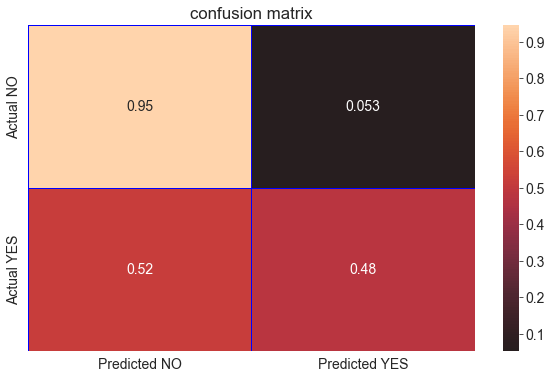

In [70]:
sns.heatmap(test_confusion, center=0, annot=True, linewidths=.5, linecolor='b', xticklabels=['Predicted NO', 'Predicted YES'], yticklabels=['Actual NO', 'Actual YES']);
plt.title('confusion matrix');

# Training a Decision Tree Model

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
?DecisionTreeClassifier

In [73]:
model2 = DecisionTreeClassifier(random_state=42)

In [74]:
model2.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [75]:
model2.score(X_train, train_targets), model2.score(X_val, val_targets), model2.score(X_test, test_targets)

(1.0, 0.787940340084731, 0.7745822745822746)

The model is having a training accuracy of 100%, a validation accuracy of 79% and a test accuracy of 77%.

This tells us that the model is overfitting, because it does not generalize well on data it hasnt seen (validation and test data)

**hyperparameter tuning**

We would use a helper function 'criterion' to get the best criterion hyperparameter

In [76]:
def criterion(ctn):
    model2 = DecisionTreeClassifier(random_state=42, criterion=ctn)
    model2.fit(X_train, train_targets)
    train_error = 1 - model2.score(X_train, train_targets)
    val_error = 1 - model2.score(X_val, val_targets)
    test_error = 1 - model2.score(X_test, test_targets)
    return {'criterion': ctn, 'train_error': train_error, 'val_error': val_error, 'test_error': test_error}

In [77]:
criterion('entropy')

{'criterion': 'entropy',
 'train_error': 0.0,
 'val_error': 0.20666241077128433,
 'test_error': 0.2235697235697236}

In [78]:
criterion('gini')

{'criterion': 'gini',
 'train_error': 0.0,
 'val_error': 0.21205965991526898,
 'test_error': 0.22541772541772542}

We would use a helper function 'splitter' to get the best splitter hyperparameter

In [79]:
def splitter(split):
    model2 = DecisionTreeClassifier(random_state=42, splitter=split)
    model2.fit(X_train, train_targets)
    train_error = 1 - model2.score(X_train, train_targets)
    val_error = 1 - model2.score(X_val, val_targets)
    test_error = 1 - model2.score(X_test, test_targets)
    return {'splitter': split, 'train_error': train_error, 'val_error': val_error, 'test_error': test_error}

In [80]:
splitter('best')

{'splitter': 'best',
 'train_error': 0.0,
 'val_error': 0.21205965991526898,
 'test_error': 0.22541772541772542}

In [81]:
splitter('random')

{'splitter': 'random',
 'train_error': 0.0,
 'val_error': 0.20422494341593644,
 'test_error': 0.2187957187957188}

Lets define a helper function called 'test_params' that takes different different hyperparameters

In [82]:
def test_params(**params):
    model2 = DecisionTreeClassifier(random_state=42, splitter= 'best', criterion='gini', **params)
    model2.fit(X_train, train_targets)
    train_error = 1 - model2.score(X_train, train_targets)
    val_error = 1 - model2.score(X_val, val_targets)
    test_error = 1 - model2.score(X_test, test_targets)
    return {'train_error': train_error, 'val_error': val_error, 'test_error': test_error}

In [83]:
test_params(min_samples_leaf = 119, max_depth = 50, max_features = 117)

{'train_error': 0.15104861195296404,
 'val_error': 0.15588184086820267,
 'test_error': 0.16327866327866325}

**accuracy of the model**

Lets put together all the hyperparameters and compute the accuracy of the model

In [84]:
model2 = DecisionTreeClassifier(random_state=42, splitter= 'best', criterion='gini', min_samples_leaf = 119, max_depth = 50, max_features = 117)

In [85]:
model2.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=50, max_features=117, min_samples_leaf=119,
                       random_state=42)

In [86]:
train_pred = model2.predict(X_train)
val_pred = model2.predict(X_val)
test_pred = model2.predict(X_test)

In [87]:
train_acc1 = round(model2.score(X_train, train_targets), 2)
print("train accuracy: {:2}%".format(train_acc1 *100))

train accuracy: 85.0%


In [88]:
val_acc1 = round(model2.score(X_val, val_targets), 2)
print("validation accuracy: {:2}%".format(val_acc1 *100))

validation accuracy: 84.0%


In [89]:
test_acc1 = round(model2.score(X_test, test_targets), 2)
print("test accuracy: {:2}%".format(test_acc1 *100))

test accuracy: 84.0%


The model had a **training accuracy of 85%**, a **validation accuracy of 84%**, and a **test accuracy of 84%**

**confusion matrix of the model**

It shows us the True Negative, False Positive, False Negative, True Positive of the model

In [90]:
test_confusion = cf(test_targets, test_pred, normalize='true')
test_confusion

array([[0.94697424, 0.05302576],
       [0.53464514, 0.46535486]])

The confusion matrix above tells us the performance of the model as follows:

1. 95% of the predicted NO was actually NO.
2. 5% of the predicted YES was actaully NO.
3. 53% of the predicted YES was actually YES.
4. 47% of the predicted NO was actually YES.

*lets plot a heatmap for the confusion matrix above*

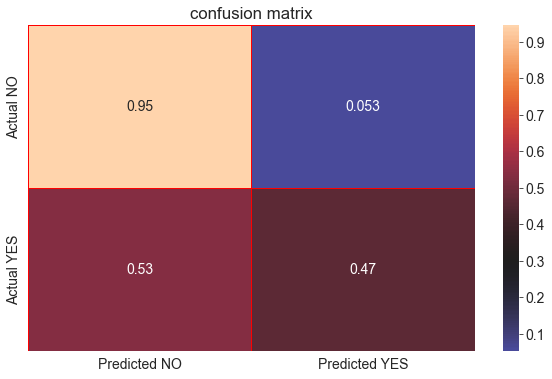

In [91]:
sns.heatmap(test_confusion, center=0.3, annot=True, linewidths=.9, linecolor='r', xticklabels=['Predicted NO', 'Predicted YES'], yticklabels=['Actual NO', 'Actual YES']);
plt.title('confusion matrix');

**feature importance**

Lets see the importance of each feature to the model

In [92]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model2.feature_importances_
}).sort_values('importance', ascending=False).head(20)

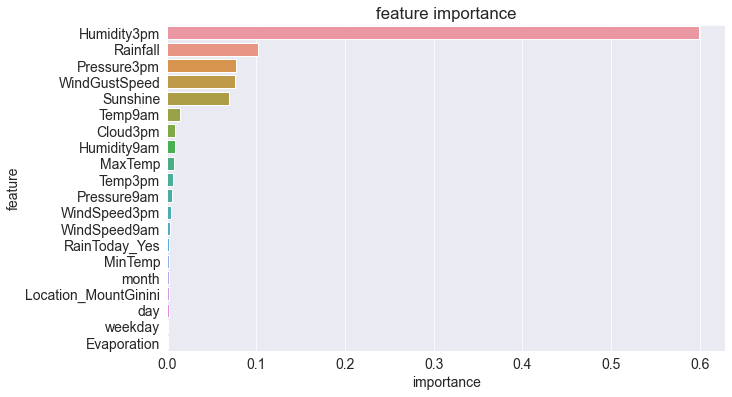

In [93]:
sns.barplot(data=importance_df, x='importance', y='feature');
plt.title('feature importance');

The model had Humidity at 3pm as the highest importance. Which means that Humidity at 3pm has a very high determining advantage to predict if there would be rain tommorow or not.

# Training a Random Forest Model

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
?RandomForestClassifier

In [96]:
model3 = RandomForestClassifier(n_jobs=-1, random_state=42)

In [97]:
model3.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [98]:
model3.score(X_train, train_targets), model3.score(X_val, val_targets), model3.score(X_test, test_targets)

(0.9999595910615429, 0.853809993616157, 0.8437283437283437)

The model is having a training accuracy of 100%, validation accuracy of 85%, test accuracy of 84%


In [99]:
# number of the decision trees the random forest model used
len(model3.estimators_)

100

**hyperparameter tuning**

A helper function for criterion hyperparameter

In [100]:
def criterion(ctn):
    model3 = RandomForestClassifier(n_jobs=-1, random_state=42, criterion=ctn).fit(X_train, train_targets)
    train_error = 1 - model3.score(X_train, train_targets)
    val_error = 1 - model3.score(X_val, val_targets)
    test_error = 1 - model3.score(X_test, test_targets)
    return {'criterion ': ctn, 'train_error': train_error, 'val_error': val_error, 'test_error': test_error}

In [101]:
criterion('gini')

{'criterion ': 'gini',
 'train_error': 4.040893845713711e-05,
 'val_error': 0.14619000638384305,
 'test_error': 0.1562716562716563}

In [102]:
criterion('entropy')

{'criterion ': 'entropy',
 'train_error': 3.0306703842852833e-05,
 'val_error': 0.1447971678950728,
 'test_error': 0.15704165704165707}

A helper function called 'test_params' to test different hyperparameters

In [103]:
def test_params(**params):
    model3 = RandomForestClassifier(n_jobs=-1, random_state=42, **params).fit(X_train, train_targets)
    train_error = 1 - model3.score(X_train, train_targets)
    val_error = 1 - model3.score(X_val, val_targets)
    test_error = 1 - model3.score(X_test, test_targets)
    return {'train_error': train_error, 'val_error': val_error, 'test_error': test_error}

In [104]:
test_params(criterion='gini', bootstrap=True, n_estimators = 73, max_features=13)

{'train_error': 5.051117307153241e-05,
 'val_error': 0.14555162207649008,
 'test_error': 0.1549241549241549}

**accuracy of the model**

Lets put together all the hyperparameters and compute the accuracy of the model

In [105]:
model3 = RandomForestClassifier(n_jobs=-1, random_state=42, criterion='gini', bootstrap=True, n_estimators = 73, max_features=13)

In [106]:
model3.fit(X_train, train_targets)

RandomForestClassifier(max_features=13, n_estimators=73, n_jobs=-1,
                       random_state=42)

In [107]:
train_pred = model3.predict(X_train)
val_pred = model3.predict(X_val)
test_pred = model3.predict(X_test)

In [108]:
train_acc2 = round(model3.score(X_train, train_targets), 2)
print("train accuracy: {:2}%".format(train_acc2 *100))

train accuracy: 100.0%


In [109]:
val_acc2 = round(model3.score(X_val, val_targets), 2)
print("validation accuracy: {:2}%".format(val_acc2 *100))

validation accuracy: 85.0%


In [110]:
test_acc2 = round(model3.score(X_test, test_targets), 2)
print("test accuracy: {:2}%".format(test_acc2 *100))

test accuracy: 85.0%


The model has a **training accuracy of 100%**, a **validation accuracy of 85%**, and a **test accuracy of 85%**

**confusion matrix of the model**

It shows us the True Negative, False Positive, False Negative, True Positive of the model

In [111]:
test_confusion = cf(test_targets, test_pred, normalize='true')
test_confusion

array([[0.95406431, 0.04593569],
       [0.52203162, 0.47796838]])

The confusion matrix above tells us the performance of the model as follows:

1. 95% of the predicted NO was actually NO.
2. 5% of the predicted YES was actaully NO.
3. 52% of the predicted YES was actually YES.
4. 48% of the predicted NO was actually YES.

*visualization of the confusion matrix above*

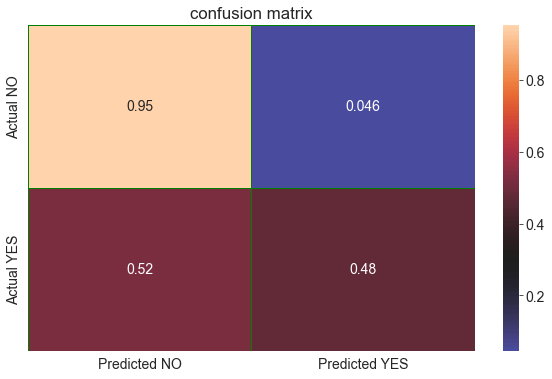

In [112]:
sns.heatmap(test_confusion, center=0.3, annot=True, linewidths=.9, linecolor='g', xticklabels=['Predicted NO', 'Predicted YES'], yticklabels=['Actual NO', 'Actual YES']);
plt.title('confusion matrix');

**feature importance**

Lets see the importance of each feature to the model

In [113]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model3.feature_importances_
}).sort_values('importance', ascending=False).head(40)

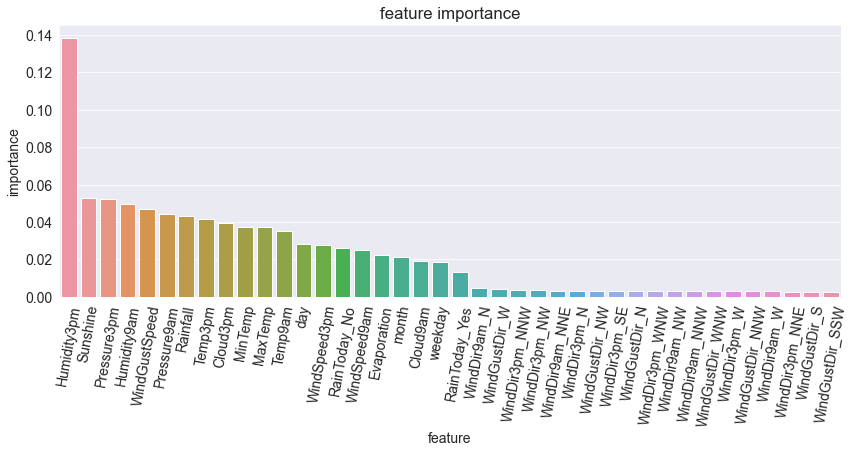

In [114]:
plt.figure(figsize=(14, 5))
sns.barplot(data=importance_df, x='feature', y='importance');
plt.xticks(rotation=80);
plt.title('feature importance');

**Model Selection**

We would be choosing the best model to use for our predictions.

Lets check them out:

Logistic Regression Model: **training accuracy of 85%**, a **validation accuracy of 85.2%**, and a **test accuracy of 84%**

Decision Tree Model: **training accuracy of 85%**, a **validation accuracy of 84%**, and a **test accuracy of 84%**

Random Forest Model: **training accuracy of 100%**, a **validation accuracy of 85%**, and a **test accuracy of 85%**

**Random Forest** *is the best model to use for this classification problem*

**sample predictions**

In [115]:
train_pred[:50]

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No'], dtype=object)

In [116]:
val_pred[:50]

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No'], dtype=object)

In [117]:
test_pred[:50]

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No'], dtype=object)

**saving the model weights**

In [118]:
import joblib

In [119]:
austria_rain = {
    'model': model3,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [120]:
joblib.dump(austria_rain, 'austria_rain.joblib')

['austria_rain.joblib']

# Summary and Conclusions

We performed the following in this project:

1. Downloading the data.
2. Data Preparation:
    
    ** Spliting the data into train, validation and test set.

    ** Scaling numeric columns.
    
    ** Imputing missing values in both Numeric and categorical columns.
    
    ** Encoding Categorical columns.
    
    ** Feature Engineering.


3. Exploratory Data Analysis.
4. Training a Logistic, Decision Tree and Random Forest models.
5. Computing the accuracies of the models.
5. Model Selection.
6. Saving the Model.

We have reached the end of this project which i have trained a model to predict whether or not rain is gonna fall tomorrow in australia.

**THANKS** for your Time.

# References

In this work, multiple libraries and projects were consulted and used as reference.
The following list comprises the most relevant ones that should provide further insights on the subject.

1. https://seaborn.pydata.org/generated/seaborn.heatmap.html
2. https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text
3. https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [121]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "wells-2104/predict-next-day-rain-in-australia" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/wells-2104/predict-next-day-rain-in-australia


'https://jovian.ai/wells-2104/predict-next-day-rain-in-australia'